# 1. Data preparation

Importing required libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [2]:
#Uploading dataset
df = pd.read_csv("dccdrainagecleaningprogrammerecordsp20110926-1405.csv")
print(df.head)

<bound method NDFrame.head of       RecordID  StreetID        Date  VehicleID  JobID  Grease
0            1    6585.0  01/11/2009        1.0    2.0   False
1            2    6150.0  02/11/2009        1.0    3.0   False
2            3    6497.0  02/11/2009        1.0    9.0   False
3            4    5521.0  04/11/2009        1.0    2.0   False
4            5    6061.0  04/11/2009        1.0   10.0   False
...        ...       ...         ...        ...    ...     ...
9096      9106    5235.0  06/07/2011        3.0    8.0   False
9097      9107    5230.0  06/07/2011       19.0    5.0    True
9098      9108    5144.0  06/07/2011       19.0    5.0   False
9099      9109    6150.0  05/07/2011        3.0    1.0   False
9100      9110    5583.0  12/07/2011        3.0    7.0   False

[9101 rows x 6 columns]>


In [3]:
df.head(5)

,RecordID,StreetID,Date,VehicleID,JobID,Grease
0,1,6585.0,01/11/2009,1.0,2.0,False
1,2,6150.0,02/11/2009,1.0,3.0,False
2,3,6497.0,02/11/2009,1.0,9.0,False
3,4,5521.0,04/11/2009,1.0,2.0,False
4,5,6061.0,04/11/2009,1.0,10.0,False


In [4]:
df.shape

(9101, 6)

In [5]:
df.describe

<bound method NDFrame.describe of       RecordID  StreetID        Date  VehicleID  JobID  Grease
0            1    6585.0  01/11/2009        1.0    2.0   False
1            2    6150.0  02/11/2009        1.0    3.0   False
2            3    6497.0  02/11/2009        1.0    9.0   False
3            4    5521.0  04/11/2009        1.0    2.0   False
4            5    6061.0  04/11/2009        1.0   10.0   False
...        ...       ...         ...        ...    ...     ...
9096      9106    5235.0  06/07/2011        3.0    8.0   False
9097      9107    5230.0  06/07/2011       19.0    5.0    True
9098      9108    5144.0  06/07/2011       19.0    5.0   False
9099      9109    6150.0  05/07/2011        3.0    1.0   False
9100      9110    5583.0  12/07/2011        3.0    7.0   False

[9101 rows x 6 columns]>

In [6]:
df.describe() 

,RecordID,StreetID,VehicleID,JobID
count,9101.000000,9083.000000,9021.000000,9020.000000
mean,4558.748379,6373.561268,8.389536,10.577938
std,2628.343058,1297.740487,6.122069,10.140559
min,1.000000,4391.000000,1.000000,1.000000
25%,2283.000000,5362.000000,3.000000,2.000000
50%,4559.000000,6069.000000,8.000000,5.000000
75%,6834.000000,7658.000000,11.000000,18.000000
max,9110.000000,8811.000000,21.000000,43.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9101 entries, 0 to 9100
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RecordID   9101 non-null   int64  
 1   StreetID   9083 non-null   float64
 2   Date       9028 non-null   object 
 3   VehicleID  9021 non-null   float64
 4   JobID      9020 non-null   float64
 5   Grease     9101 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 364.5+ KB


In [8]:
df.dtypes

RecordID       int64
StreetID     float64
Date          object
VehicleID    float64
JobID        float64
Grease          bool
dtype: object

### DataPrep.EDA: Task-Centric Exploratory Data Analysis for Statistical Modeling in Python

# 2. Handling missing values


Get the number of missing data points per column


In [9]:
missing_values_count = df.isnull().sum()
missing_values_count[0:8]

RecordID      0
StreetID     18
Date         73
VehicleID    80
JobID        81
Grease        0
dtype: int64

Number of missing points in the columns


In [10]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.46148774859905506


Percent of data that is missing. 0.46%


In [11]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("dccdrainagecleaningprogrammerecordsp20110926-1405.csv", na_values = missing_value_formats)
def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan

In [12]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(0, 6)


Checking duplicates

In [13]:
df.duplicated().sum() 

0

In [14]:
df["VehicleID"].unique()

array([ 1.,  2.,  5.,  4.,  3.,  8., nan,  9., 10.,  6., 11., 13., 14.,
       12., 15., 16., 17., 18.,  7., 19., 20., 21.])

In [15]:
df['JobID'].fillna(method='pad')
df['JobID'].head()

0     2.0
1     3.0
2     9.0
3     2.0
4    10.0
Name: JobID, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9101 entries, 0 to 9100
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RecordID   9101 non-null   int64  
 1   StreetID   9083 non-null   float64
 2   Date       9028 non-null   object 
 3   VehicleID  9021 non-null   float64
 4   JobID      9020 non-null   float64
 5   Grease     9101 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 364.5+ KB


Dropped all rows with all NaN. Renamed dataframe to new_df.

In [17]:
new_df = df.dropna(axis = 0, how ='all')

In [18]:
new_df.isnull().sum()

RecordID      0
StreetID     18
Date         73
VehicleID    80
JobID        81
Grease        0
dtype: int64

Checking if we have any NaN values in our dataset

In [19]:
new_df.isnull().values.any()

True

In [20]:
new_df.isnull().sum()

RecordID      0
StreetID     18
Date         73
VehicleID    80
JobID        81
Grease        0
dtype: int64

In [21]:
new_df=new_df.drop(['Date'], axis=1)
new_df = df.dropna(axis=0)

In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8986 entries, 0 to 9100
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RecordID   8986 non-null   int64  
 1   StreetID   8986 non-null   float64
 2   Date       8986 non-null   object 
 3   VehicleID  8986 non-null   float64
 4   JobID      8986 non-null   float64
 5   Grease     8986 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 430.0+ KB


In [23]:
new_df.isnull().sum()

RecordID     0
StreetID     0
Date         0
VehicleID    0
JobID        0
Grease       0
dtype: int64

The Date dtype was object. So, For using date of dataset I need to change format to the date and create a new columns by (Year, Month, Day)

In [24]:
new_df['Date']=pd.to_datetime(new_df['Date'], format='%d/%m/%Y')

In [25]:
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month
new_df['Day'] = new_df['Date'].dt.day
new_df.head()

,RecordID,StreetID,Date,VehicleID,JobID,Grease,Year,Month,Day
0,1,6585.0,2009-11-01,1.0,2.0,False,2009,11,1
1,2,6150.0,2009-11-02,1.0,3.0,False,2009,11,2
2,3,6497.0,2009-11-02,1.0,9.0,False,2009,11,2
3,4,5521.0,2009-11-04,1.0,2.0,False,2009,11,4
4,5,6061.0,2009-11-04,1.0,10.0,False,2009,11,4


#Dropped the "Date" column. Because I have splitted this value. So now, my data frame is 9101 rows x 8 columns.

In [26]:
new_df=new_df.drop(['Date'], axis=1)

In [27]:
new_df

,RecordID,StreetID,VehicleID,JobID,Grease,Year,Month,Day
0,1,6585.0,1.0,2.0,False,2009,11,1
1,2,6150.0,1.0,3.0,False,2009,11,2
2,3,6497.0,1.0,9.0,False,2009,11,2
3,4,5521.0,1.0,2.0,False,2009,11,4
4,5,6061.0,1.0,10.0,False,2009,11,4
...,...,...,...,...,...,...,...,...
9096,9106,5235.0,3.0,8.0,False,2011,7,6
9097,9107,5230.0,19.0,5.0,True,2011,7,6
9098,9108,5144.0,19.0,5.0,False,2011,7,6
9099,9109,6150.0,3.0,1.0,False,2011,7,5


In [28]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8986 entries, 0 to 9100
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RecordID   8986 non-null   int64  
 1   StreetID   8986 non-null   float64
 2   VehicleID  8986 non-null   float64
 3   JobID      8986 non-null   float64
 4   Grease     8986 non-null   bool   
 5   Year       8986 non-null   int64  
 6   Month      8986 non-null   int64  
 7   Day        8986 non-null   int64  
dtypes: bool(1), float64(3), int64(4)
memory usage: 570.4 KB


### Convert float type to integer type | convert float dataframe columns to integer

In [29]:
new_df["StreetID"]=new_df["StreetID"].apply(int)
new_df["VehicleID"]=new_df["VehicleID"].apply(int)
new_df["JobID"]=new_df["JobID"].apply(int)
new_df["Year"]=new_df["Year"].apply(int)
new_df["Month"]=new_df["Month"].apply(int)
new_df["Day"]=new_df["Day"].apply(int)

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8986 entries, 0 to 9100
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   RecordID   8986 non-null   int64
 1   StreetID   8986 non-null   int64
 2   VehicleID  8986 non-null   int64
 3   JobID      8986 non-null   int64
 4   Grease     8986 non-null   bool 
 5   Year       8986 non-null   int64
 6   Month      8986 non-null   int64
 7   Day        8986 non-null   int64
dtypes: bool(1), int64(7)
memory usage: 570.4 KB


# 3. Visualisation

### Stastistical graphics

This figure shows statistical information of the Grease. 

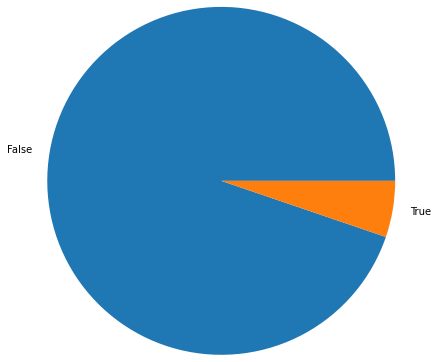

False    8516
True      470
Name: Grease, dtype: int64


In [31]:
values=new_df['Grease'].value_counts() #Counting the unique values frequency
labels=new_df['Grease'].unique().tolist() #Creating the unique values labels
plt.pie(values, labels=labels, radius=2) #Creating the pie chart
plt.show()
print(values)

<AxesSubplot:xlabel='Grease'>

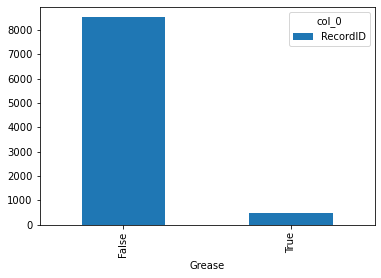

In [32]:
cut_count_table = pd.crosstab(index=new_df['Grease'],columns='RecordID') 
cut_count_table.plot(kind='bar') 

Showing all variables in the dataframe on a single figure

<AxesSubplot:title={'center':'Drain'}>

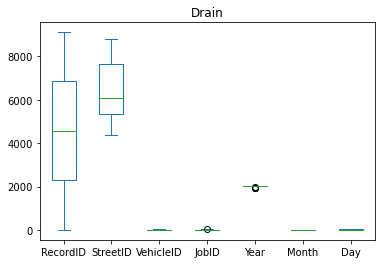

In [33]:
new_df.plot(kind='box', title="Drain")

But, this figure couldn't show a clear results. 

In [34]:
news_df=new_df.drop(['Grease'], axis=1) #renamed framework(dropped Grease)

In [35]:
news_df

,RecordID,StreetID,VehicleID,JobID,Year,Month,Day
0,1,6585,1,2,2009,11,1
1,2,6150,1,3,2009,11,2
2,3,6497,1,9,2009,11,2
3,4,5521,1,2,2009,11,4
4,5,6061,1,10,2009,11,4
...,...,...,...,...,...,...,...
9096,9106,5235,3,8,2011,7,6
9097,9107,5230,19,5,2011,7,6
9098,9108,5144,19,5,2011,7,6
9099,9109,6150,3,1,2011,7,5


#### Creat subplot of each variables with it's own scale

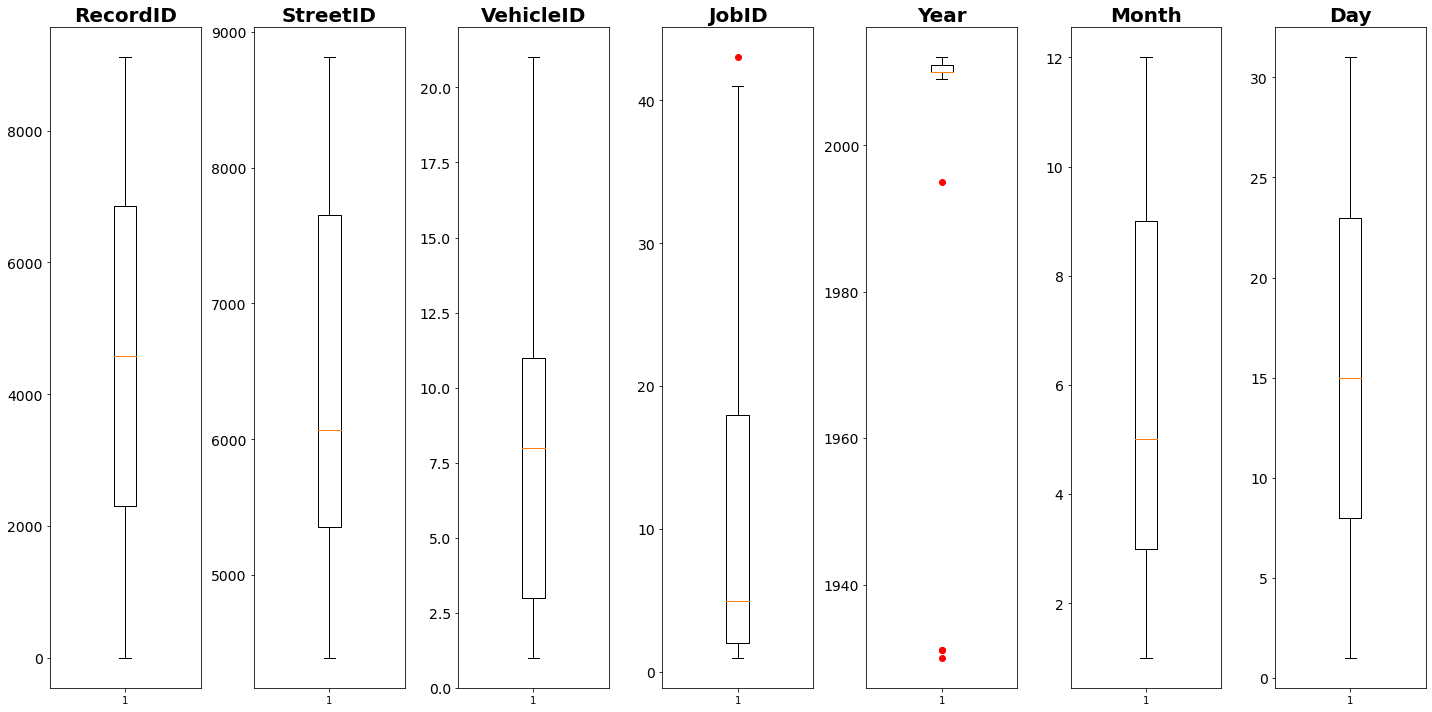

In [36]:
red_circle=dict(markerfacecolor="red", marker="o", markeredgecolor="red")
fig, axs =plt.subplots(1, len(news_df.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(news_df.iloc[:,i], flierprops=red_circle)
    ax.set_title(news_df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()

I found the outliers are the that outisde of the box. 

In [37]:
# Sorted by Year
news_df.sort_values(by="Year",ascending=True) 

,RecordID,StreetID,VehicleID,JobID,Year,Month,Day
7671,7681,6143,6,17,1930,2,11
6389,6398,6670,21,41,1931,12,6
342,349,8053,9,1,1931,11,9
6769,6778,6509,1,3,1995,1,11
0,1,6585,1,2,2009,11,1
...,...,...,...,...,...,...,...
7505,7515,5454,16,23,2011,2,21
7506,7516,4710,5,16,2011,2,22
7499,7509,4706,21,4,2011,2,18
9100,9110,5583,3,7,2011,7,12


Dropped outliers and renamed dataframe as news1_df (dropped yearly years 1930, 1931, 1931, 1995)

In [38]:
news1_df=news_df.drop(df.index[[7671,6389,342,6769]]) 

In [39]:
news1_df.sort_values(by="Year",ascending=True)

,RecordID,StreetID,VehicleID,JobID,Year,Month,Day
0,1,6585,1,2,2009,11,1
406,413,5668,3,1,2009,12,14
405,412,6143,4,11,2009,12,16
404,411,6190,4,4,2009,12,16
403,410,6249,4,4,2009,12,16
...,...,...,...,...,...,...,...
7505,7515,5454,16,23,2011,2,21
7506,7516,4710,5,16,2011,2,22
7499,7509,4706,21,4,2011,2,18
9100,9110,5583,3,7,2011,7,12


#### Creat subplot of each variables with it's own scale

In [40]:
news1_df.sort_values(by="StreetID",ascending=True)

,RecordID,StreetID,VehicleID,JobID,Year,Month,Day
792,799,4391,16,16,2010,1,18
2196,2204,4391,9,6,2010,3,16
4017,4026,4392,3,32,2010,7,14
4417,4426,4392,3,32,2010,8,5
4426,4435,4392,3,32,2010,8,6
...,...,...,...,...,...,...,...
5957,5966,8807,2,3,2010,11,8
8920,8930,8808,9,22,2011,6,20
9042,9052,8810,2,7,2011,7,1
8995,9005,8810,3,7,2011,6,27


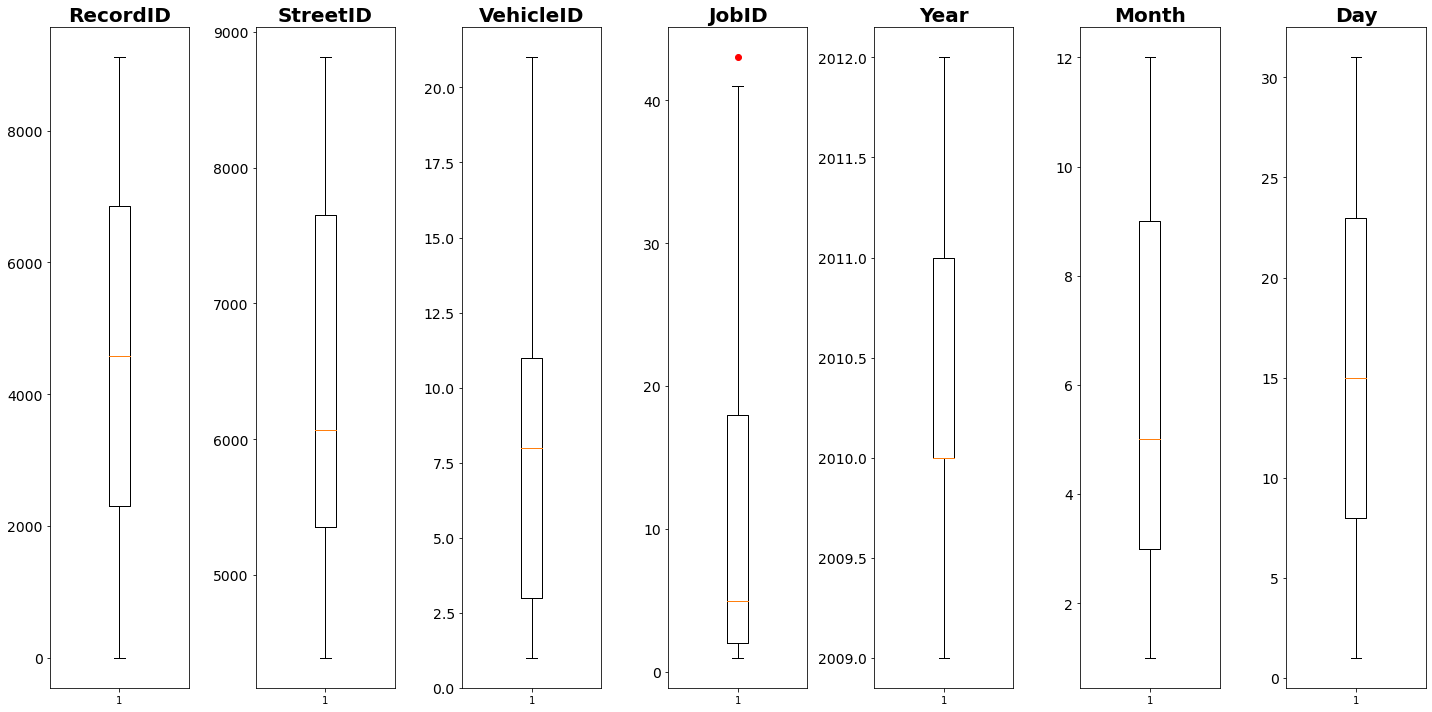

In [41]:
red_circle=dict(markerfacecolor="red", marker="o", markeredgecolor="red")
fig, axs =plt.subplots(1, len(news1_df.columns), figsize=(20,10))
for i, ax in enumerate(axs.flat):
    ax.boxplot(news1_df.iloc[:,i], flierprops=red_circle)
    ax.set_title(news1_df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()

In [42]:
last_df=new_df.drop(df.index[[7671,6389,342,6769]])

<AxesSubplot:xlabel='StreetID', ylabel='Count'>

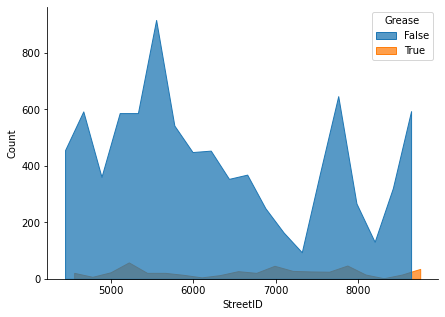

In [43]:
### Relationships between Grease and StreetID 
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.histplot(last_df, x="StreetID", hue="Grease", multiple='dodge', element="poly")


<AxesSubplot:xlabel='RecordID', ylabel='Density'>

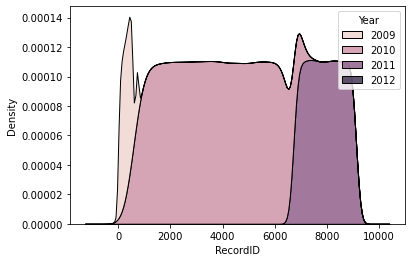

In [44]:
### Relationships between RecordID value to Year 

sns.kdeplot(data=last_df, x="RecordID", hue="Year", multiple="stack")

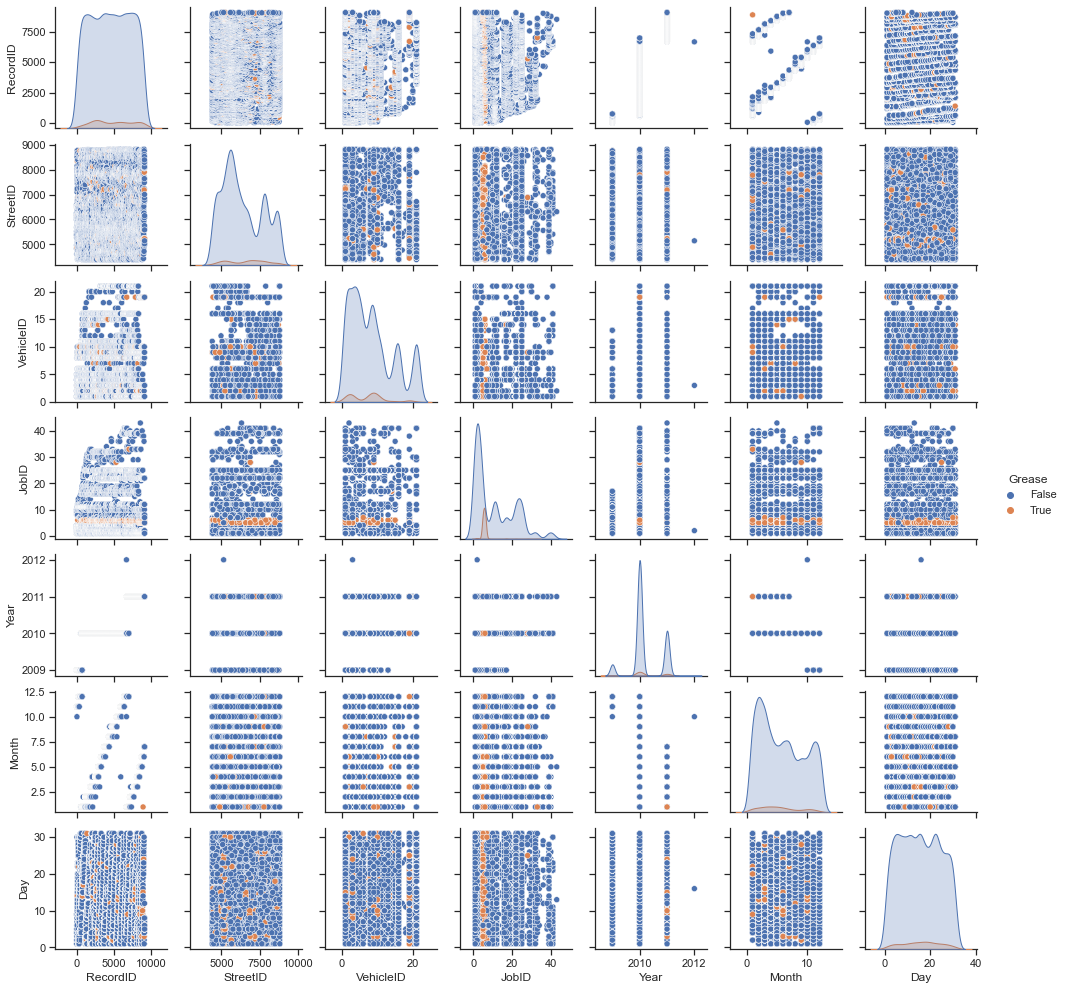

In [45]:
### Relationships between to Grease 
import seaborn as sns
sns.set_theme(style="ticks",)
sns.pairplot(last_df, hue="Grease", size=2)


This figure shows a scatter plot matrix for the visualize the relationship between pair of variables, allowing many relationships to be explored in one chart. (Hue is the Grease variable)
Grease variable in data to map plot aspects to different colors.

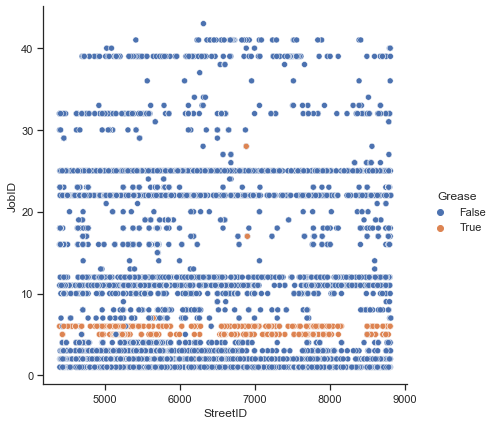

In [46]:
sns.pairplot(last_df, x_vars="StreetID", y_vars="JobID", hue="Grease", size=6)

Scatter plot shows the realatioship between StreetID and JobID. Hue is the Grease variable. At this time, we can see that JobID and SteetID are the essential features in this dataset.

### Poisson Distribution

In my data, have no need to analyze by distribution. The Record number is just numbering of maintenanace, StreetID is name of drain locations, JobID is type of the work, VehicleID is type of the vehicle. But, I checked Poison distribution and Normal distribution on my data(StreetID).  

In [47]:
# Find the dataset's StreetID's mean value
print(np.mean(last_df['StreetID']))

# Find the StreetId's standard deviation
print(np.std(last_df['StreetID'], ddof=1))

6370.6988421287015
1298.3074910072976


In [48]:
from numpy import random
random.poisson(lam=6370.6988421287015, size=int(1e2))

array([6424, 6504, 6301, 6344, 6302, 6372, 6289, 6444, 6398, 6455, 6509,
       6328, 6247, 6409, 6208, 6273, 6255, 6286, 6280, 6391, 6575, 6376,
       6315, 6330, 6366, 6410, 6324, 6311, 6573, 6256, 6340, 6404, 6430,
       6367, 6444, 6293, 6395, 6430, 6335, 6395, 6365, 6444, 6408, 6209,
       6407, 6479, 6301, 6356, 6258, 6266, 6406, 6338, 6347, 6310, 6369,
       6419, 6395, 6384, 6459, 6410, 6283, 6379, 6218, 6393, 6412, 6195,
       6248, 6378, 6405, 6337, 6406, 6464, 6416, 6460, 6419, 6371, 6399,
       6401, 6355, 6378, 6281, 6394, 6257, 6256, 6437, 6405, 6278, 6270,
       6283, 6459, 6444, 6306, 6562, 6399, 6361, 6406, 6381, 6380, 6356,
       6353])

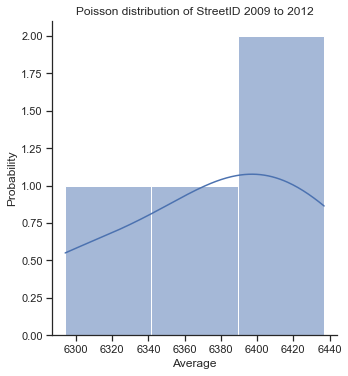

In [49]:
random.seed(10)
poiss=sns.displot(random.poisson(lam=6370.6988421287015, size=4), kde=True)
plt.xlabel("Average")
plt.ylabel("Probability")
plt.title("Poisson distribution of StreetID 2009 to 2012")
plt.show()

Poison distribution of StreetID value of 2009 to 2012.
kde 

### Normal distribution

In [50]:
random.normal(size=10)

array([ 0.26551159,  0.10854853,  0.00429143, -0.17460021,  0.43302619,
        1.20303737, -0.96506567,  1.02827408,  0.22863013,  0.44513761])

In [51]:
# Find the dataset's StreetID's mean value
print(np.mean(last_df['StreetID']))

# Find the StreetId's standard deviation
print(np.std(last_df['StreetID'], ddof=1))

6370.6988421287015
1298.3074910072976


In [52]:
random.normal(loc=6370, scale=5, size=int(1e2))

array([6364.31698894, 6370.67568439, 6377.42268501, 6364.60097557,
       6360.1113586 , 6361.28313852, 6371.33035082, 6381.92483665,
       6375.61845627, 6378.36311107, 6370.49574608, 6376.98998189,
       6368.64376006, 6373.06602092, 6368.66341406, 6367.25345493,
       6370.66354148, 6367.61928993, 6376.5423654 , 6370.9750664 ,
       6372.00104994, 6368.31183831, 6376.28236132, 6366.34015249,
       6373.30115776, 6368.24564054, 6365.3028332 , 6367.55331392,
       6365.97704429, 6368.93651181, 6368.30429877, 6371.56084968,
       6372.82576335, 6369.26289871, 6369.87047332, 6371.44547102,
       6367.30060464, 6373.5408001 , 6374.21112369, 6371.01790399,
       6381.97351832, 6374.58729469, 6369.43863764, 6368.18909776,
       6368.83908872, 6367.4913555 , 6375.64392577, 6366.51094985,
       6369.59438908, 6367.3535196 , 6375.23091428, 6362.90721985,
       6368.18750408, 6369.39047154, 6371.59678211, 6372.30451451,
       6368.92105054, 6374.94536229, 6371.57376889, 6382.33825

In [53]:
random.seed(13)
random.normal(loc=6370, scale=5, size=10)

array([6366.43804669, 6373.76883189, 6369.77748461, 6372.25906169,
       6376.72550854, 6372.66168944, 6376.7509395 , 6374.30605687,
       6377.39342869, 6364.77311435])

### Calculating single probablities using the Normal distribution

• X∼N(μ=6370,σ=1298)


Area = Probability
Probability of the random variable being between 5000 and 8000

In [54]:
from scipy.stats import norm
# How would I find:
# P(X > 5072)?
print(1-norm.cdf(5072, loc = 6370, scale = 1298))
# P(5072 < X < 7668)?
norm.cdf(7668, loc = 6370, scale = 1298)-norm.cdf(5072, loc = 6370, scale = 1298)

0.8413447460685429


0.6826894921370859

Probability of (X > 5072) is 0.84.

Probability of (5072 < X < 7668) is 0.68.

### Producing PDF and CDF plots

Text(0, 0.5, 'pdf')

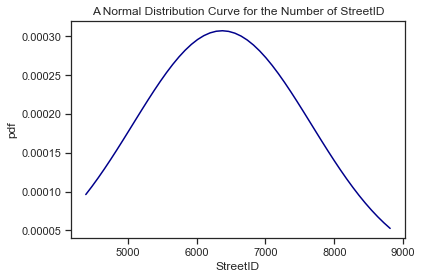

In [55]:
# Probability density function. Used the mean and the standard deviation respectively to plot the Normal distribution
import scipy.stats as ss
curve=np.linspace(4391, 8811)
#plot normal pdf:
plt.plot(curve, norm.pdf(curve, 6370, 1298), color='darkblue')
plt.title('A Normal Distribution Curve for the Number of StreetID')
plt.xlabel('StreetID')
plt.ylabel('pdf')

Text(0, 0.5, 'CDF')

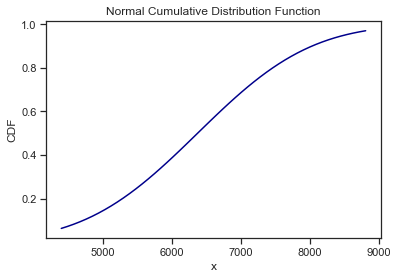

In [57]:
# Define the x and y values to use for CDF
curve=np.linspace(4391, 8811)
# Plot the normal Cumulative distribution function.
plt.plot(curve, norm.cdf(curve, 6370, 1298), color='darkblue')
plt.title('Normal Cumulative Distribution Function')
plt.xlabel('x')
plt.ylabel('CDF')

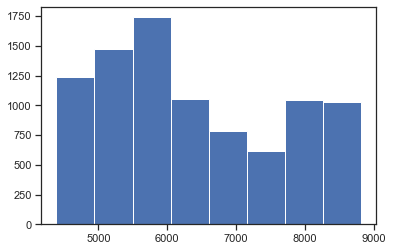

In [58]:
# Plot the data:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(last_df['StreetID'], 8)
plt.show()

# 4. Machine learning

My data has more than 50 samples, prediction type is category and supervised data.

I can choose Classification, Decision Trees and Random Forest.

## 4.1. Decision Trees 

The second value is the p-value <0.05 (as it is here), the data is not consistent with that from a Normal distribution.

In [59]:
last_df

,RecordID,StreetID,VehicleID,JobID,Grease,Year,Month,Day
0,1,6585,1,2,False,2009,11,1
1,2,6150,1,3,False,2009,11,2
2,3,6497,1,9,False,2009,11,2
3,4,5521,1,2,False,2009,11,4
4,5,6061,1,10,False,2009,11,4
...,...,...,...,...,...,...,...,...
9096,9106,5235,3,8,False,2011,7,6
9097,9107,5230,19,5,True,2011,7,6
9098,9108,5144,19,5,False,2011,7,6
9099,9109,6150,3,1,False,2011,7,5


In [60]:
# Use 'StreetID', 'VehicleID', 'JobID' and 'Year' features into X
X = last_df.iloc[:, [1, 2, 3, -3]].values

# Store the 'Grease' feature into 'y'
y = last_df.iloc[:, -4].values

# Display X and y 
X, y

(array([[6585,    1,    2, 2009],
        [6150,    1,    3, 2009],
        [6497,    1,    9, 2009],
        ...,
        [5144,   19,    5, 2011],
        [6150,    3,    1, 2011],
        [5583,    3,    7, 2011]]),
 array([False, False, False, ..., False, False, False]))

### Splitting the dataset into the Training set and Test set

In [61]:
# Load the library 'sklearn.model_selection'
from sklearn.model_selection import train_test_split

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8982, 4), (8982,), (6736, 4), (2246, 4), (6736,), (2246,))

### Feature Scaling


p^r * (1-p)^{n-r}    


In [62]:
conda install -c anaconda scipy


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [63]:
# Load the library 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler

# Create and initialise an object by calling a method 'StandardScaler()'
sc = StandardScaler()

# Convert the X_train and X_test into standised format
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Display the trandofrmed values
X_train, X_test

(array([[ 1.72052329, -0.05786691, -0.95113873,  1.49998799],
        [-0.77421886, -0.71105754, -0.65598645, -0.3766686 ],
        [-0.51512561,  2.06500264, -0.65598645,  1.49998799],
        ...,
        [ 1.86791166,  0.43202606, -0.65598645,  1.49998799],
        [-1.23422573,  2.06500264, -0.65598645,  1.49998799],
        [ 0.373859  ,  0.2687284 , -0.95113873, -0.3766686 ]]),
 array([[ 1.86325729, -0.05786691,  1.11492721,  1.49998799],
        [-0.42358967, -0.8743552 , -0.45921827, -0.3766686 ],
        [-0.29637024,  2.06500264, -0.65598645, -0.3766686 ],
        ...,
        [-0.41040229, -0.38446223,  0.81977493, -0.3766686 ],
        [ 0.88351248,  0.59532372,  2.78745678,  1.49998799],
        [ 0.48789105, -0.05786691, -0.95113873, -0.3766686 ]]))

### Training the Decision Tree Classification model on the Training set

In [64]:
# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Predicting the Test set results

In [65]:
# Calculate the predicted vlaue by calling a method predict()
y_pred = classifier.predict(X_test)
y_pred[0:100]

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

### Making the Confusion Matrix

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2130
        True       0.94      0.96      0.95       116

    accuracy                           0.99      2246
   macro avg       0.97      0.98      0.97      2246
weighted avg       0.99      0.99      0.99      2246



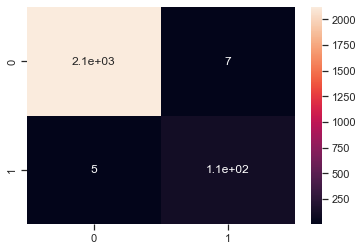

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [67]:
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))

Accuracy is: 0.9946571682991986


[Text(0.4732142857142857, 0.9, 'X[2] <= -0.607\ngini = 0.1\nsamples = 6736\nvalue = [6382, 354]'),
 Text(0.23214285714285715, 0.7, 'X[3] <= -1.315\ngini = 0.004\nsamples = 3192\nvalue = [3185, 7]'),
 Text(0.14285714285714285, 0.5, 'X[1] <= 0.024\ngini = 0.03\nsamples = 265\nvalue = [261, 4]'),
 Text(0.07142857142857142, 0.3, 'X[0] <= 1.454\ngini = 0.009\nsamples = 232\nvalue = [231, 1]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.0\nsamples = 225\nvalue = [225, 0]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.21428571428571427, 0.3, 'X[0] <= 0.552\ngini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.25, 0.1, 'gini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(0.32142857142857145, 0.5, 'X[3] <= 0.562\ngini = 0.002\nsamples = 2927\nvalue = [2924, 3]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 2033\nvalue = [2033, 0]'),
 Text(0.35714285714285715, 0.3, '

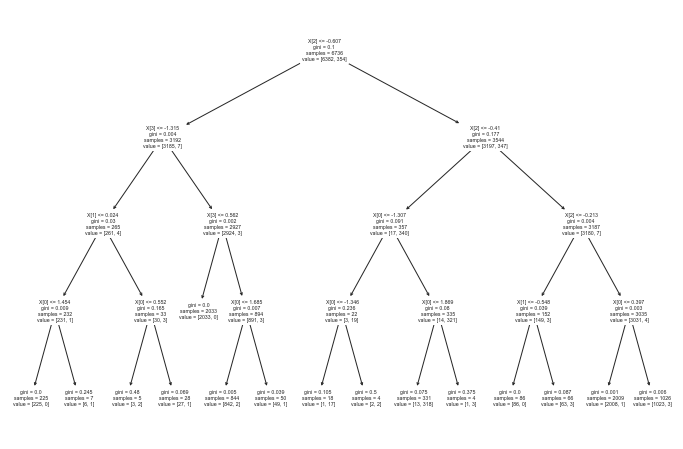

In [68]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(classifier.fit(X_train, y_train)) 

### Implementation
So, I have created a model that uses decision tree algorithm to predict whether a drain will blocked by grease or not. The Accuracy of the model is 99.4%. The Government can use this model to decide whether it should use grease removing instruments or not.

## 4.2. Random Forest


In [69]:
from sklearn.model_selection import train_test_split

X = last_df[['StreetID', 'Year', 'JobID', 'VehicleID']]  # Features
y = last_df['Grease']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6287, 4), (2695, 4), (6287,), (2695,))

In [71]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred[0:100]

array([ True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False])

In [72]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9940630797773655


In [73]:
print('Number of observations in the X_training data:', len(X_train))
print('Number of observations in the y_test data:', len(X_test))

Number of observations in the X_training data: 6287
Number of observations in the y_test data: 2695


In [74]:
clf.predict([[5521, 2009, 1, 2]])

array([False])

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2554
        True       0.95      0.94      0.94       141

    accuracy                           0.99      2695
   macro avg       0.97      0.97      0.97      2695
weighted avg       0.99      0.99      0.99      2695



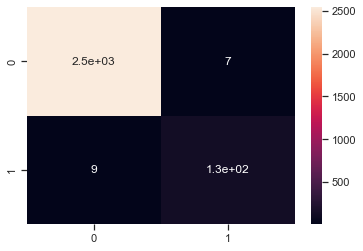

In [75]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [76]:
pd.crosstab(y_test, y_pred, rownames=["Actual Grease"], colnames=["Predicted Grease"])

Predicted Grease,False,True
Actual Grease,,
False,2547,7
True,9,132


Number of accurate predictions= 2234

Number of inaccurate predictions= 12

Model accuracy (2234/2246*100)= 99.46

### Finding Important Features in Scikit-learn
I am finding important features or selecting features in the Drain dataset. In scikit-learn, you can perform this task in the following steps:

1. First, I need to create a random forests model.
2. Second, use the feature importance variable to see feature importance scores.
3. Third, visualize these scores using the seaborn library.

In [77]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
feature_imp = pd.Series(clf.feature_importances_, index=['StreetID', 'Year', 'JobID', 'VehicleID']).sort_values(ascending=False)
feature_imp

JobID        0.871205
StreetID     0.084922
VehicleID    0.037846
Year         0.006027
dtype: float64

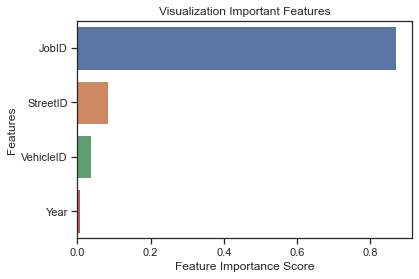

In [79]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualization Important Features")
#plt.legend()
plt.show()